## Heart Failure 

Gagal jantung merupakan penyakit yang disebabkan oleh CVD.Orang dengan penyakit CVD atau yang memiliki resiko terkena CVD disebabkan karena adanya :
- Hipertensi
- Diabetes
- Hiperlipidemia
- Penyakit bawaan

Penyakit CVD ini dapat dicegah, dengan :
- Membatasi penggunaan tembakau 
- Membatasi Diet tidak sehat
- Obesitas
- Kurangnya aktivitas fisik (olahraga)
- Membatasi Minuman keras (Alkohol)

Tentang dataset :

1. Age: usia pasien (dalam tahun)

2. Anemia: Penurunan sel darah merah atau hemoglobin

3. High blood pressure: Jika pasien menderita hipertensi

4. Creatinine phosphokinase: Tingkat enzim CPK dalam darah (mcg/L)

5. Diabetes: Jika pasien menderita diabetes

6. Ejection fraction: Persentase darah yang meninggalkan jantung pada setiap kontraksi

7. Sex: Wanita atau pria

8. Platelets: Trombosit dalam darah (kiloplatelet/mL)

9. Serum creatinine: Tingkat kreatinin dalam darah (mg/dL)

10. Serum sodium: Tingkat natrium dalam darah (mEq/L)

11. Smoking: Jika pasien merokok

12. Time: Periode tindak lanjut (dalam hari)

13. (target) death event: Jika pasien meninggal selama masa tindak lanjut

Membuat model untuk memprediksi kemungkinan pasien meninggal karena gagal jantung.

###  Import Pustaka 

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, PowerTransformer


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE

### Data Loading 

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Melihat dataset

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Melihat tipe dataset

In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
df.groupby('DEATH_EVENT').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


Karena Variable yang nantinya akan dipakai adalah DEATH_EVENT, maka dapat disimpulkan bahwa dataset ini tidak seimbang karena :
- Total Kematian karena gagal jantung 96
- Total orang yang Hidup 203


### Data Cleaning

Melihat apakah df mempunyai missing values

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada missing values pada dataset

Melihat apakah ada missing data

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

tidak ada missing data.

### Explorasi Data

Plot Korelasi antara variable yang ada di dataset

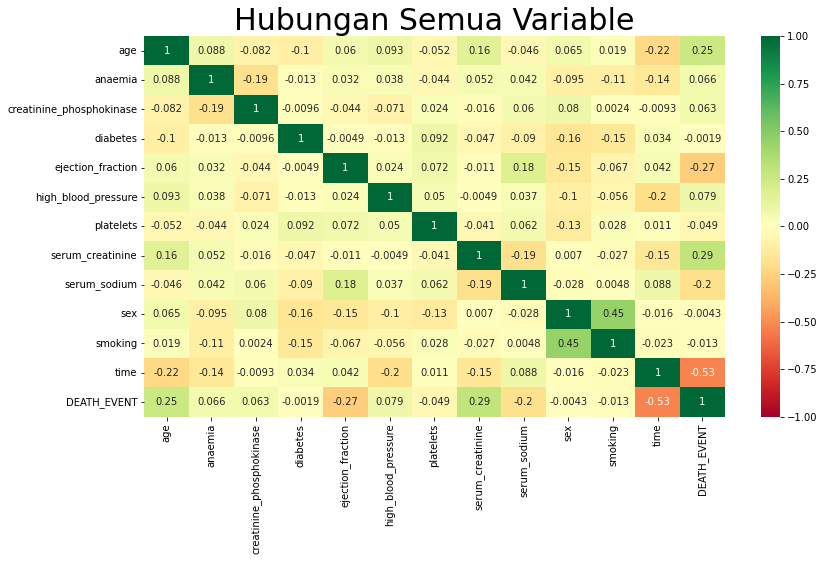

In [8]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap="RdYlGn", annot=True)
plt.title("Hubungan Semua Variable", fontsize=30)
plt.show()

Korelasi yang positif :
- DEATH_EVENT dan age 
- DEATH_EVENT dan serum_creatinine
- ejection_fraction dan serum_sodium
- sex dan smoking

korelasi yang negatif :
- DEATH_EVENT dan time
- DEATH_EVENT ejection_fraction

Memvisualisasikan data yang tidak seimbang dengan scatter plot, warna tergantung dengan DEATH_EVENT

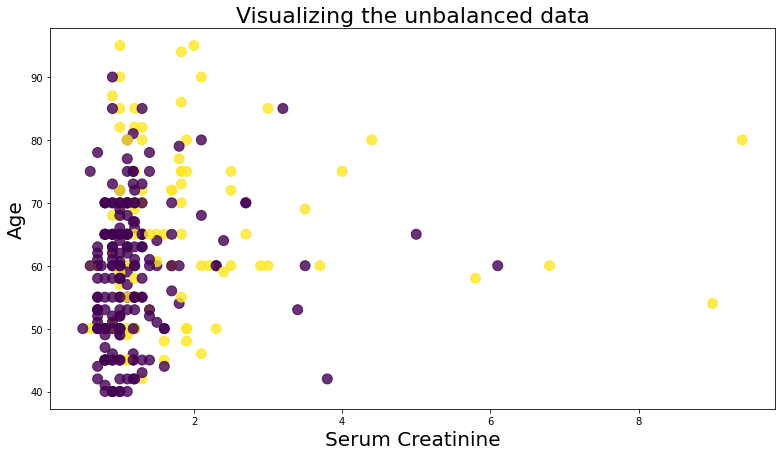

In [9]:
age = df[['age']]
sc = df[['serum_creatinine']]

plt.figure(figsize=(13,7))
plt.scatter(sc, age, c = df["DEATH_EVENT"], s=100, alpha=0.8)
plt.xlabel("Serum Creatinine", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

Lebih banyak lingkaran berwarna ungu daripada kuning.

Persentase gender pada dataset

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


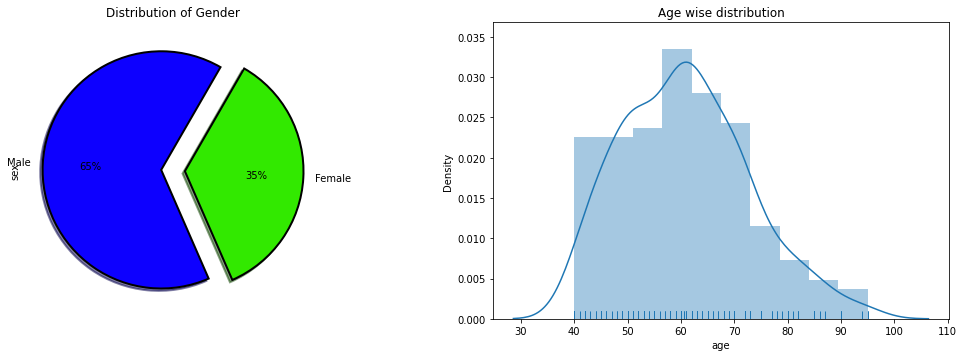

In [10]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

Dalam dataset ini persentasi pria lebih tinggi daripada wanita, dimana rata-rata usia pasien adalah sekitar 50-60 tahun.

Analisis apakah hidup berdasarkan gender

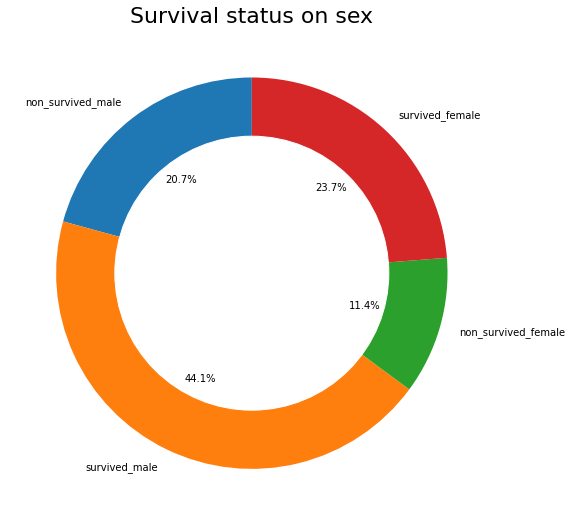

In [11]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(male[male["DEATH_EVENT"]==1]), len(male[male["DEATH_EVENT"]==0]), \
                len(female[female["DEATH_EVENT"]==1]),len(female[female["DEATH_EVENT"]==0])]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()


20,7% -> Cowok Tidak Selamat

44,1% -> Cowok Selamat

11,4% -> Cewek Tidak Selamat

23,7% -> Cewek Selamat

Analisis apakah survive jika mempunyai anemia

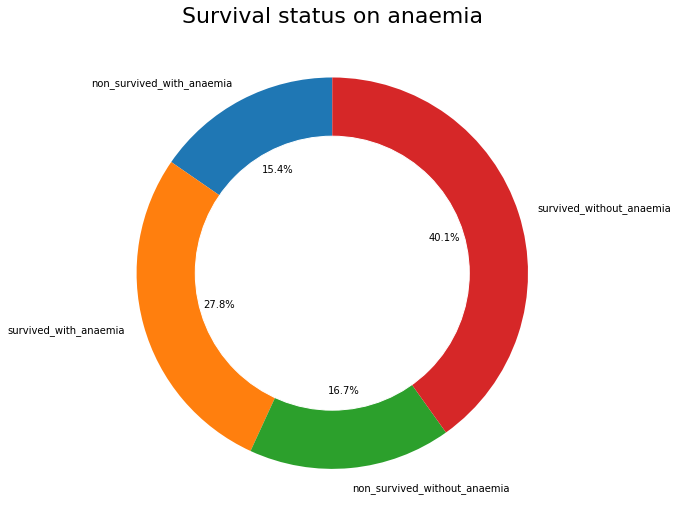

In [12]:
with_anaemia = df[df["anaemia"]==1] 
without_anaemia = df[df["anaemia"]==0] 

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(with_anaemia[with_anaemia["DEATH_EVENT"]==1]), len(with_anaemia[with_anaemia["DEATH_EVENT"]==0]), \
                len(without_anaemia[without_anaemia["DEATH_EVENT"]==1]),len(without_anaemia[without_anaemia["DEATH_EVENT"]==0])]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia",\
              "survived_without_anaemia"]

plt.figure(figsize=(9,9))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

Dari plot diatas dapat kita simpulkan bahwa :

15,4% -> Memiliki Anemia dan tidak selamat

40.1% -> Selamat tanpa memiliki Anemia

27,8% -> Selamat walaupun memiliki Anemia

16,7% -> Tidak selamat walaupun tidak ada Anemia

Analisis apakah survive jika mempunyai darah tinggi

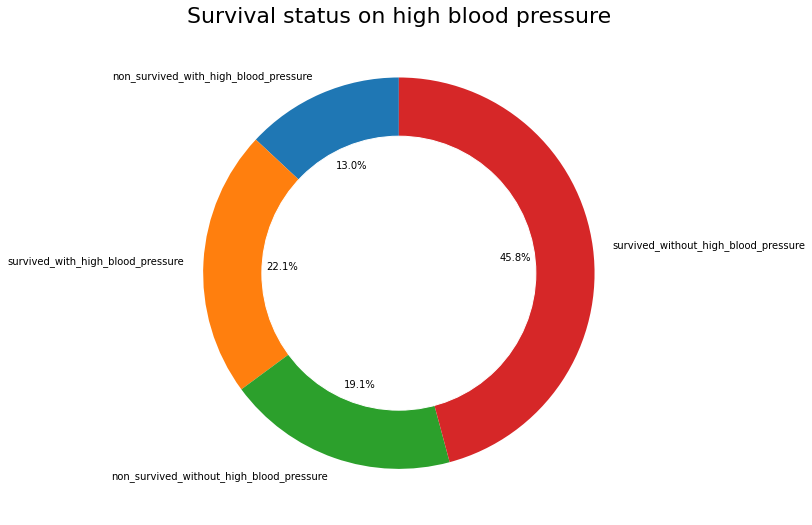

In [13]:
with_high_blood_pressure = df[df["high_blood_pressure"]==1]
without_high_blood_pressure = df[df["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]),\
                 len(with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]), \
                len(without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]),\
                 len(without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0])]
high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

13% -> Memiliki Darah Tinggi dan tidak selamat

22.1% -> Selamat memiliki Darah Tinggi

19,1% -> Tidak Selamat dan tidak memiliki darah tinggi

45,8% -> Selamat tanpa darah tinggi

### Data Preprocessing 

Membagi dua dataset

In [14]:
categorical_variables = df[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
numerical_variables = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",
                             "serum_sodium","time"]]

Categorical Data :
- Anaemia : 

0 = Tidak Memiliki Anaemia 

1 = Memiliki Anaemia

- Diabetes : 

0 = Tidak Memiliki Diabetes 

1 = Memiliki Diabetes

- High_blood_pressure :

0 = Tidak Memiliki Darah Tinggi 

1 = Memiliki Darah Tinggi

- Smoking : 

0 = Merokok 

1 = Tidak Merokok

- Sex : 

0 = Female 

1 = Male

- DEATH_EVENT : 

0 = Gagal Jantung bukan penyebab kematian 

1 = Penyebab Kematiannya adalah Gagal Jantung

In [15]:
numerical_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [16]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
numerical_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

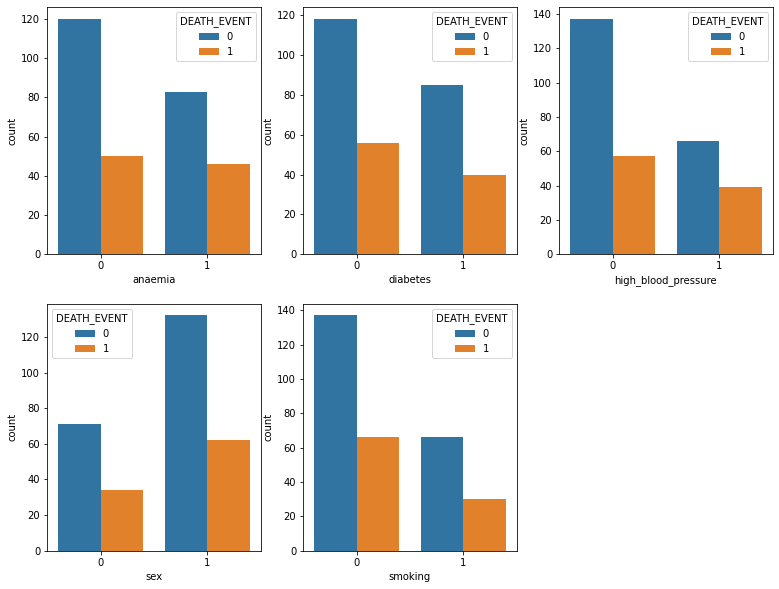

In [17]:
plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x= cat, hue = "DEATH_EVENT")
plt.show()

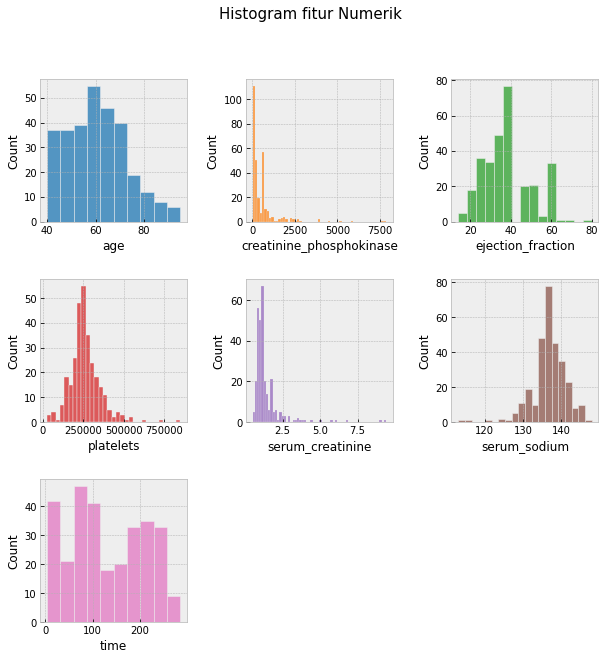

In [18]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, numerical_data)):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=df, x=name, color=col)
    plt.suptitle('Histogram fitur Numerik', fontsize=15)

Dengan memperhatikan grafik histogram variabel numeriknya, diketahui bahwa fitur creatinine_phosphokinase dan serum_creatinine sangat positif atau miring ke kanan

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

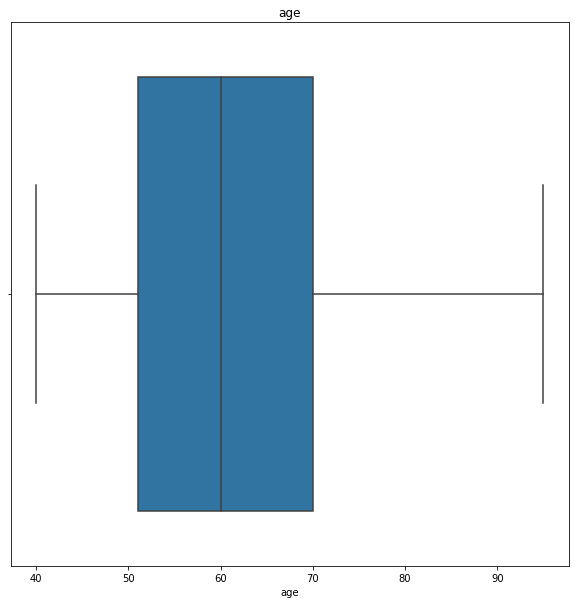

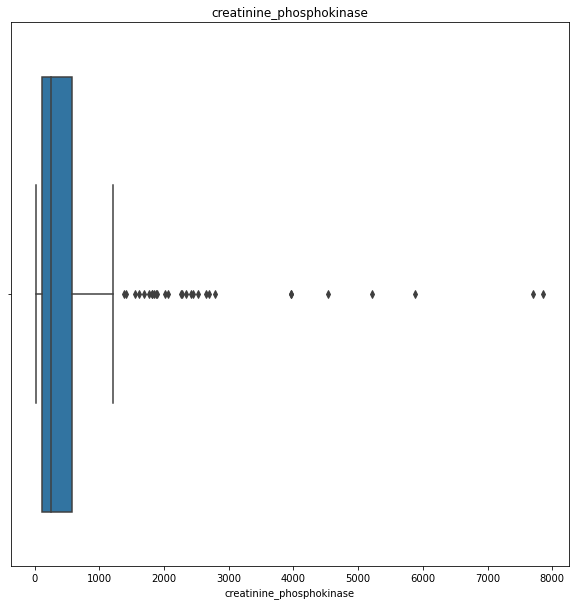

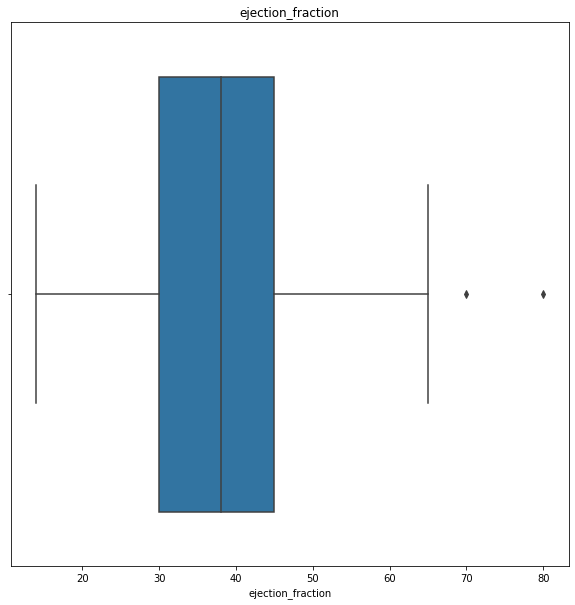

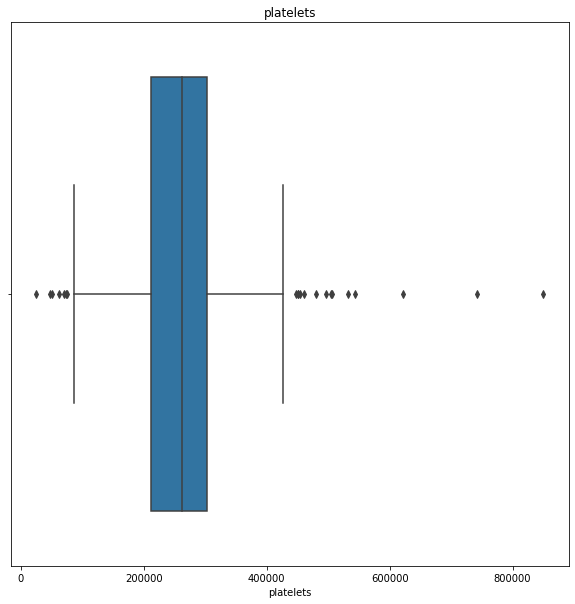

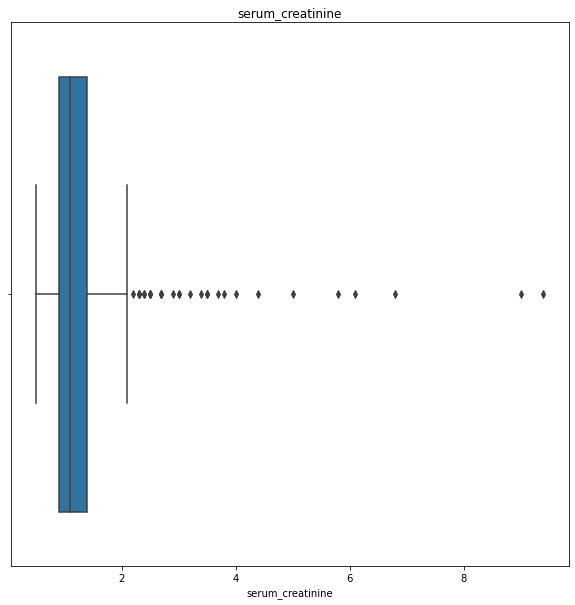

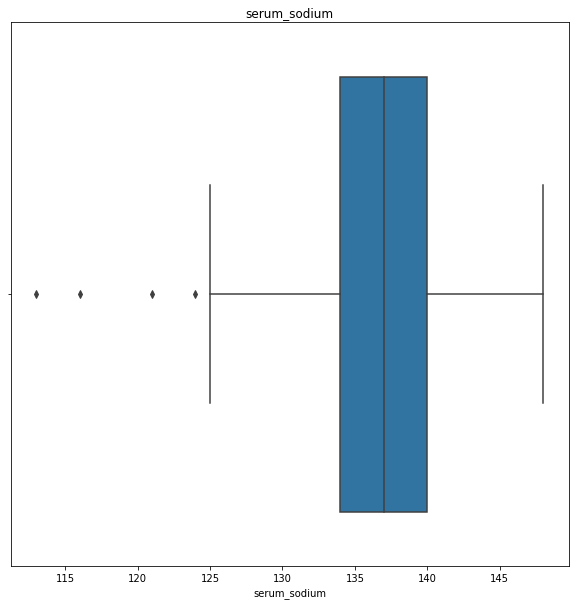

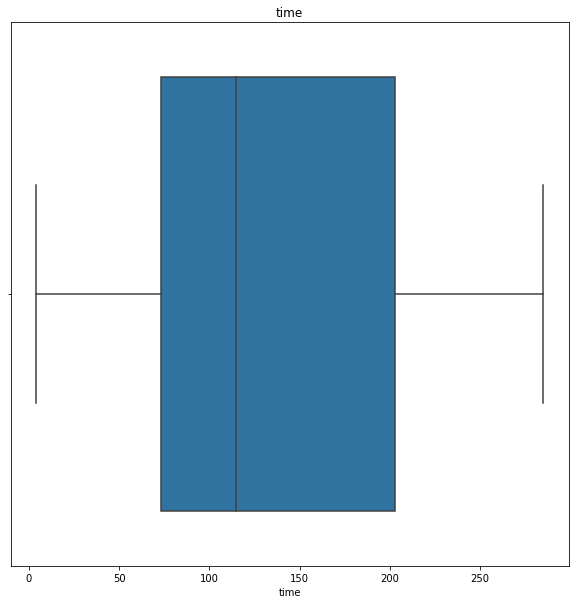

In [19]:
for feature in numerical_data:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [20]:
features_with_outliers = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

In [21]:
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

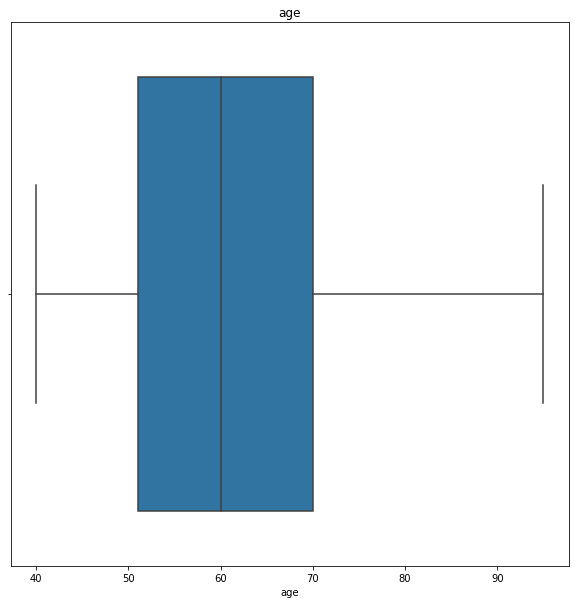

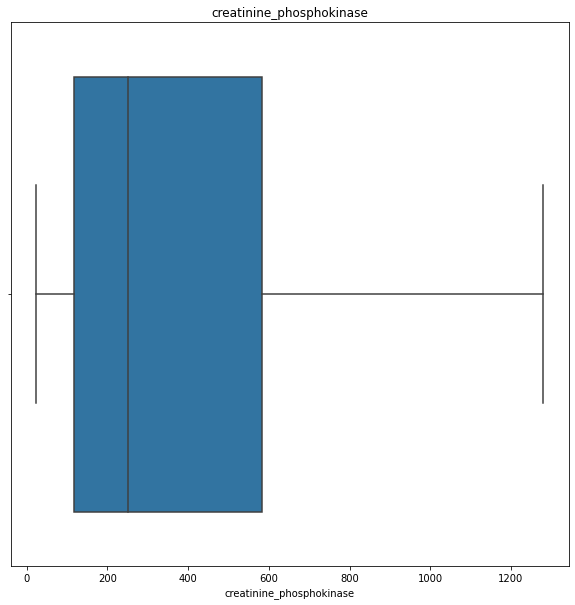

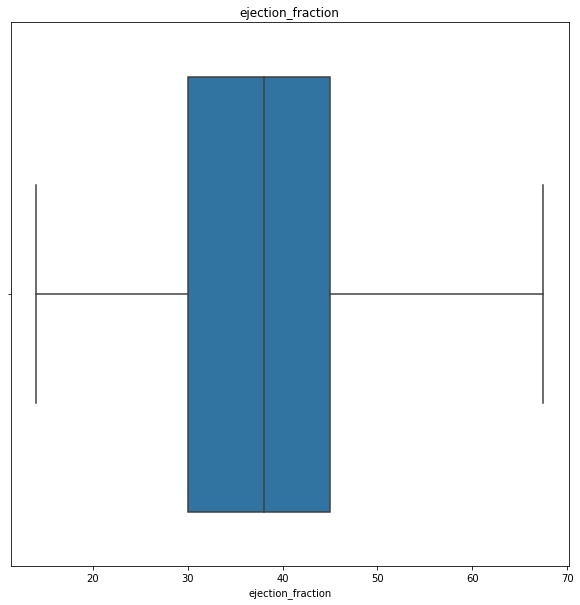

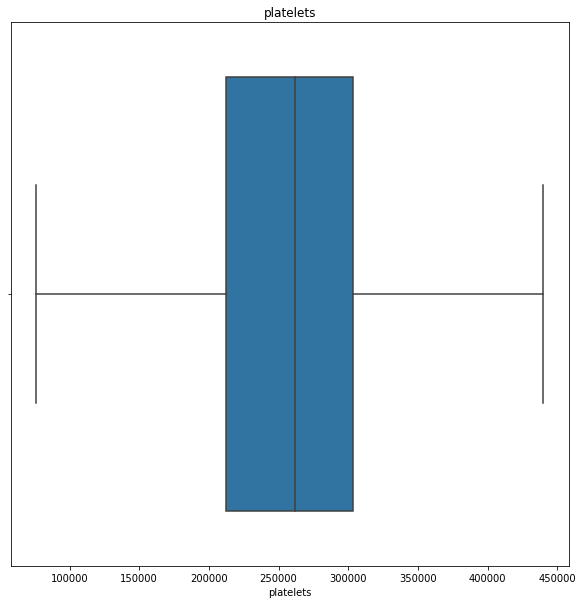

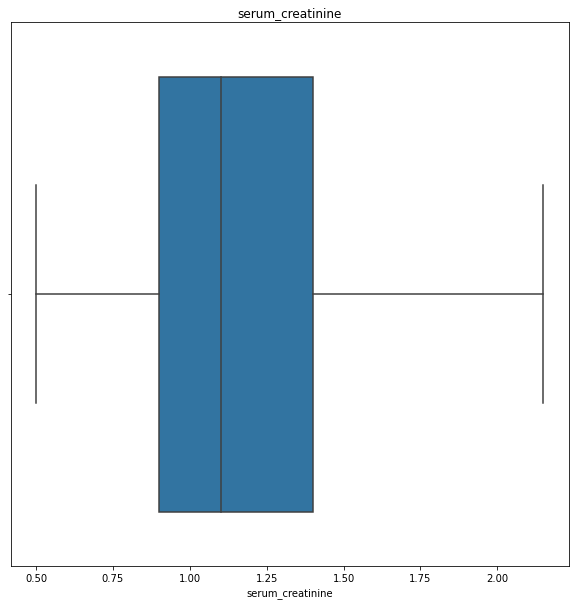

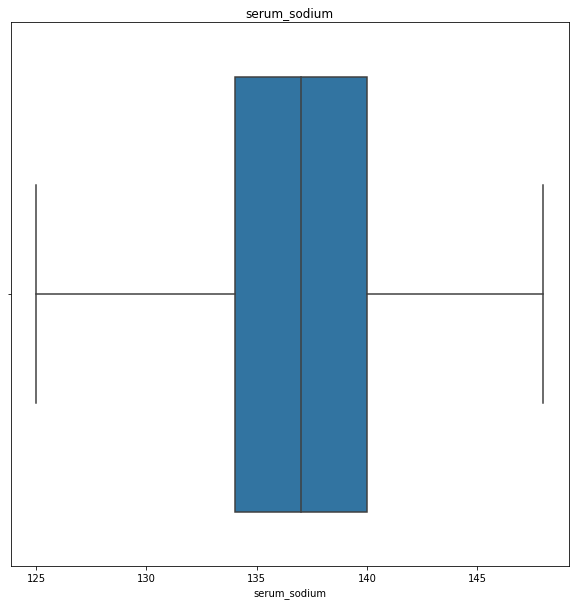

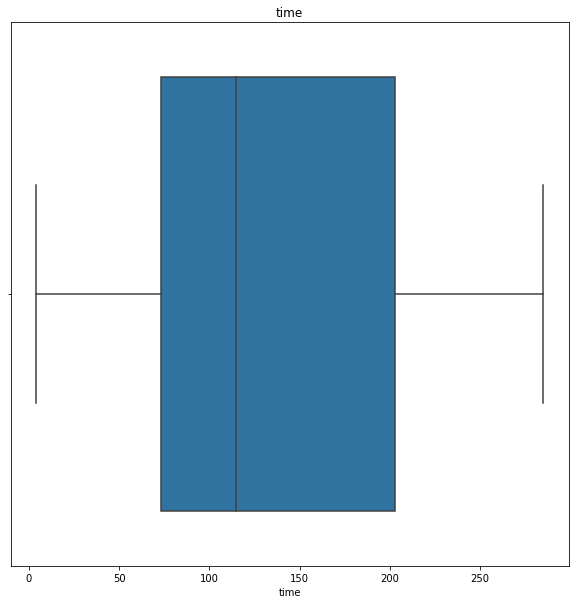

In [22]:
for feature in numerical_data:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

Encoding Categorical variables

In [23]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,1,0,4.0,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,1,0,6.0,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,1,1,7.0,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,1,0,7.0,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,0,0,8.0,1


Memisahkan fitur dan target(DEATH_EVENT)

In [24]:
X = df.iloc[:, :-1]
y = df['DEATH_EVENT']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


Memperbaiki Ketidakseimbangan kelas menggunakan SMOTE.

In [25]:
smote = SMOTE(random_state=2021, n_jobs=-1, k_neighbors=5)
smote.fit(X, y)
X_smote, y_smote = smote.fit_resample(X, y)
print(X_smote.shape)
print(y_smote.shape)

(406, 12)
(406,)


Transformasi data 
- creatinine_phosphokinase dan serum_creatinine menunjukkan kemiringan. 

1. creatinine_phosphokinase menggunakan transformasi log dapat membuat data sesuai dengan normalitas. Dalam hal ini, log-transform menghilangkan atau mengurangi skewness karena data asli mengikuti distribusi log-normal atau kira-kira begitu.

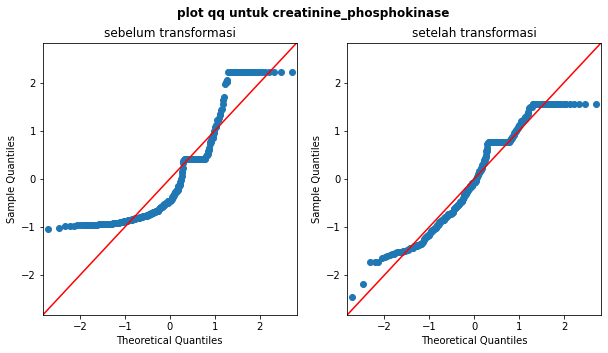

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
qqplot(df.creatinine_phosphokinase, fit=True, line='45', ax=ax[0])
ax[0].set_title('sebelum transformasi')
qqplot(np.log10(df.creatinine_phosphokinase), fit=True, line='45', ax=ax[1])
ax[1].set_title('setelah transformasi')
plt.suptitle('plot qq untuk creatinine_phosphokinase', fontweight='bold')
plt.show()

Plot qq di atas menunjukkan pengaruh transformasi log pada kreatinin_fosfokinase. Plot QQ (atau plot kuantil-kuantil) adalah plot di mana sumbu sengaja diubah untuk membuat distribusi normal (atau Gaussian) muncul dalam garis lurus. Dengan kata lain, distribusi normal sempurna akan mengikuti garis dengan kemiringan = 1 dan intersep = 0.

2. serum_creatinine menggunakan transformasi resiprokal (p = -1). Transformasi ini memiliki efek radikal karena membalikkan urutan di antara nilai-nilai dari tanda yang sama, oleh karena itu, nilai yang lebih besar menjadi lebih kecil, dan sebaliknya.

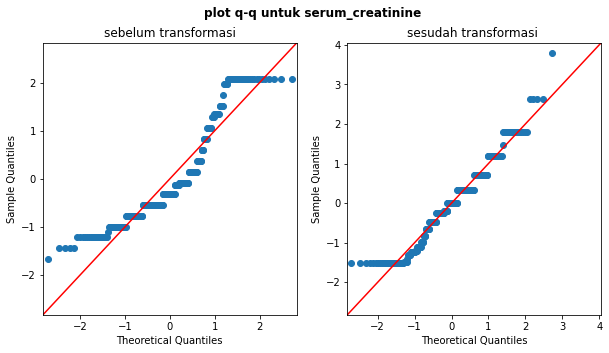

In [27]:
p = -1
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df.serum_creatinine, fit=True, line='45', ax=ax[0])
ax[0].set_title('sebelum transformasi')

qqplot(df.serum_creatinine**p, fit=True, line='45', ax=ax[1])
ax[1].set_title('sesudah transformasi ')

plt.suptitle('plot q-q untuk serum_creatinine', fontweight='bold')
plt.show()

Boxcox

Yeo-johnson

Kedua metode ini mencari nilai p yang tepat (seperti pada contoh di atas) agar distribusinya menjadi normal. Yeo-johnson adalah versi upgrade dari Boxcox karena berurusan dengan data dengan nilai negatif

In [28]:
pt = PowerTransformer(method='yeo-johnson')
X_pt = pt.fit_transform(X_smote)
X_pt

array([[ 1.0132097 , -0.78173596,  0.74430852, ...,  0.81482171,
        -0.59062442, -2.1139309 ],
       [-0.59767587, -0.78173596,  1.65805886, ...,  0.81482171,
        -0.59062442, -1.99696032],
       [ 0.25224201, -0.78173596, -0.69042452, ...,  0.81482171,
         1.69312335, -1.9451605 ],
       ...,
       [ 0.11948319,  1.2792043 ,  0.58089257, ..., -1.22726234,
        -0.59062442, -1.21574008],
       [ 1.90493917,  1.2792043 , -0.8220164 , ...,  0.81482171,
        -0.59062442, -0.94636244],
       [-0.66259599,  1.2792043 , -0.48422141, ...,  0.81482171,
        -0.59062442, -1.68366976]])

Menormalisasikan data : 
     
Menggunakan min-max scaler yang menskalakan data ke kisaran 0-1. Penskalaan diperlukan untuk ML juga seperti SVM, regresi logistik, knn yang sensitif terhadap penskalaan dan outlier (berlaku untuk masalah klasifikasi dan regresi).

In [29]:
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X_pt)

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


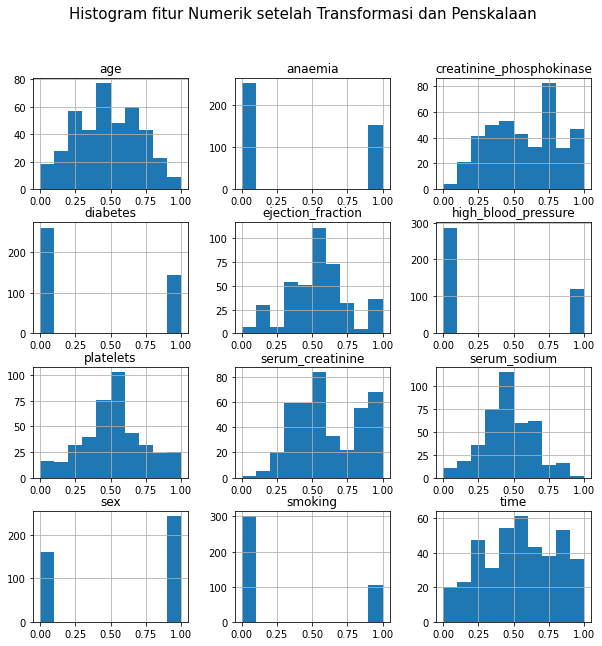

In [30]:
pd.DataFrame(X_scaled, columns=X.columns).hist(figsize=(10, 10))
plt.suptitle('Histogram fitur Numerik setelah Transformasi dan Penskalaan', fontsize=15)
plt.show()

### Pendefinisian Model 

In [31]:
X = df[["age","ejection_fraction","serum_creatinine","serum_sodium"]]
y = df["DEATH_EVENT"]

In [32]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [33]:
etr_model.feature_importances_

array([0.24061295, 0.27380116, 0.29761338, 0.18797252])

<AxesSubplot:>

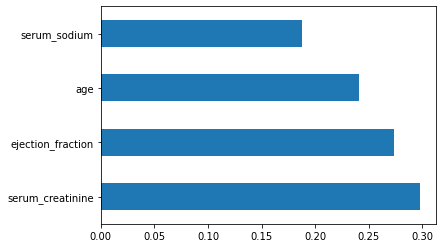

In [34]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

Top 3 features yang berkontribusi :
- time
- ejection_fraction
- serum_creatinine

In [35]:
feature_imp

age                  0.240613
ejection_fraction    0.273801
serum_creatinine     0.297613
serum_sodium         0.187973
dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 209
Length of Testing Data: 90


List untuk menyimpan value dari model akurasi yang nantinya akan dipakai untuk bar chart guna untuk membandingkan

In [39]:
accuracy_list = []

#### Logistic Regression 

Accuracy : 
 0.7555555555555555
Matrix : 
 [[59  5]
 [17  9]]
Classification Report : 
                precision    recall  f1-score   support

not gonna die       0.78      0.92      0.84        64
     will die       0.64      0.35      0.45        26

     accuracy                           0.76        90
    macro avg       0.71      0.63      0.65        90
 weighted avg       0.74      0.76      0.73        90



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


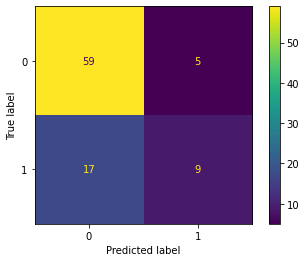

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
matrix = confusion_matrix(y_test, pred_lr)
lr_accuracy = (round(accuracy_score(pred_lr, y_test), 4) * 100) #percentage
accuracy_list.append(lr_accuracy)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_lr))
print("Matrix : \n", matrix)
print("Classification Report : \n", classification_report(y_test, pred_lr,target_names=['not gonna die', 'will die']))

plot_confusion_matrix(lr, X_test, y_test)

#### K-Nearest Neighbors 

Accuracy : 
 0.7444444444444445
Matrix : 
 [[57  7]
 [16 10]]
Classification Report : 
                precision    recall  f1-score   support

not gonna die       0.78      0.89      0.83        64
     will die       0.59      0.38      0.47        26

     accuracy                           0.74        90
    macro avg       0.68      0.64      0.65        90
 weighted avg       0.73      0.74      0.73        90



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


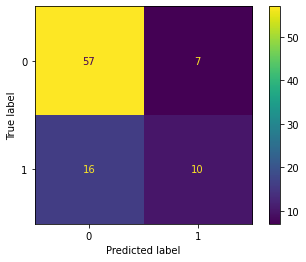

In [41]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

pred_kNN = kNN.predict(X_test)
matrix1 = confusion_matrix(y_test, pred_kNN)
kNN_accuracy = (round(accuracy_score(pred_kNN, y_test), 4) * 100) #percentage
accuracy_list.append(kNN_accuracy)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_kNN))
print("Matrix : \n",matrix1)
print("Classification Report : \n", classification_report(y_test, pred_kNN,target_names=['not gonna die', 'will die']))

plot_confusion_matrix(kNN, X_test, y_test)

#### Support Vector Machine 

Accuracy : 
 0.7666666666666667
Matrix : 
 [[60  4]
 [17  9]]
Classification Report : 
                precision    recall  f1-score   support

not gonna die       0.78      0.94      0.85        64
     will die       0.69      0.35      0.46        26

     accuracy                           0.77        90
    macro avg       0.74      0.64      0.66        90
 weighted avg       0.75      0.77      0.74        90



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


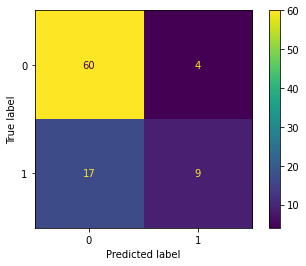

In [42]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)
matrix2 = confusion_matrix(y_test, pred_svm)
svm_accuracy = (round(accuracy_score(pred_svm, y_test), 4) * 100) #percentage
accuracy_list.append(svm_accuracy)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_svm))
print("Matrix : \n",matrix2)
print("Classification Report : \n", classification_report(y_test, pred_svm,target_names=['not gonna die', 'will die']))

plot_confusion_matrix(clf, X_test, y_test)

#### Decision Tree 

Accuracy : 
 0.7222222222222222
Matrix : 
 [[51 13]
 [12 14]]
Classification Report : 
                precision    recall  f1-score   support

not gonna die       0.81      0.80      0.80        64
     will die       0.52      0.54      0.53        26

     accuracy                           0.72        90
    macro avg       0.66      0.67      0.67        90
 weighted avg       0.73      0.72      0.72        90



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


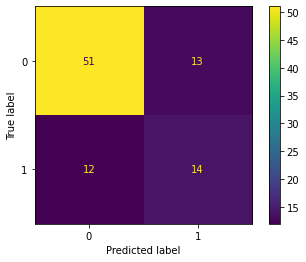

In [43]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
pred_tree = dt.predict(X_test)
matrix3 = confusion_matrix(y_test, pred_tree)
dt_accuracy = (round(accuracy_score(pred_tree, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_tree))
print("Matrix : \n", matrix3)
print("Classification Report : \n", classification_report(y_test, pred_tree,target_names=['not gonna die', 'will die']))

plot_confusion_matrix(dt, X_test, y_test)

In [44]:
params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': np.arange(2, 22, 2), # depth of tree
    'min_samples_split': [2, 3, 4], # min. no. of samples a node must have before it splits 
    'min_samples_leaf': [1, 2, 3, 4] # min. non of samples a leaf node must have
}
dt_cv = GridSearchCV(dt, params, scoring='f1', n_jobs=-1, cv=10)
dt_cv.fit(X_train, y_train)

dt_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [45]:
dt_train_pred = cross_val_predict(dt_cv, X_train, y_train, cv=10, n_jobs=-1)

best_dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=2021, 
                                    max_depth=4, criterion='entropy', min_samples_split=2, 
                                     min_samples_leaf= 1)

best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=2021)

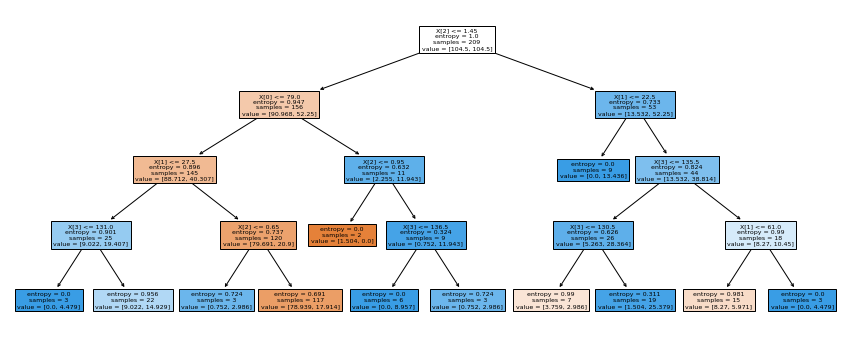

In [46]:
plt.figure(figsize=(15, 6))
plot_tree(best_dt_clf, filled=True)
plt.show()

#### Random Forest 

Accuracy : 
 0.7333333333333333
Matrix : 
 [[53 11]
 [13 13]]
Classification Report : 
                precision    recall  f1-score   support

not gonna die       0.80      0.83      0.82        64
     will die       0.54      0.50      0.52        26

     accuracy                           0.73        90
    macro avg       0.67      0.66      0.67        90
 weighted avg       0.73      0.73      0.73        90



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


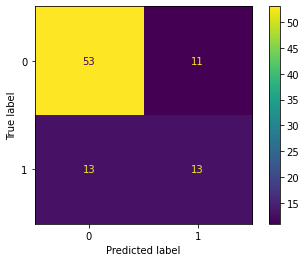

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
matrix4 = confusion_matrix(y_test, pred_rf)
rf_accuracy = (round(accuracy_score(pred_rf, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_rf))
print("Matrix : \n", matrix4)
print("Classification Report : \n", classification_report(y_test, pred_rf,target_names=['not gonna die', 'will die']))

plot_confusion_matrix(rf, X_test, y_test)

#### Naive Bayes 

Accuracy : 
 0.7777777777777778
Matrix : 
 [[58  6]
 [14 12]]
Classification Report : 
                precision    recall  f1-score   support

not gonna die       0.81      0.91      0.85        64
     will die       0.67      0.46      0.55        26

     accuracy                           0.78        90
    macro avg       0.74      0.68      0.70        90
 weighted avg       0.77      0.78      0.76        90



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


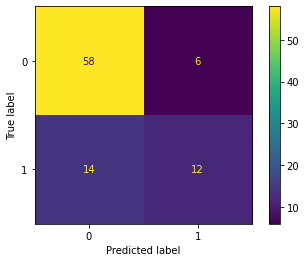

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)
matrix5 = confusion_matrix(y_test, pred_gnb)
nb_accuracy = (round(accuracy_score(pred_gnb, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_gnb))
print("Matrix : \n",matrix5)
print("Classification Report : \n", classification_report(y_test, pred_gnb,target_names=['not gonna die', 'will die']))

plot_confusion_matrix(gnb, X_test, y_test)

### Kesimpulan

In [49]:
accuracy_list

[75.56, 74.44, 76.67, 72.22, 73.33, 77.78]

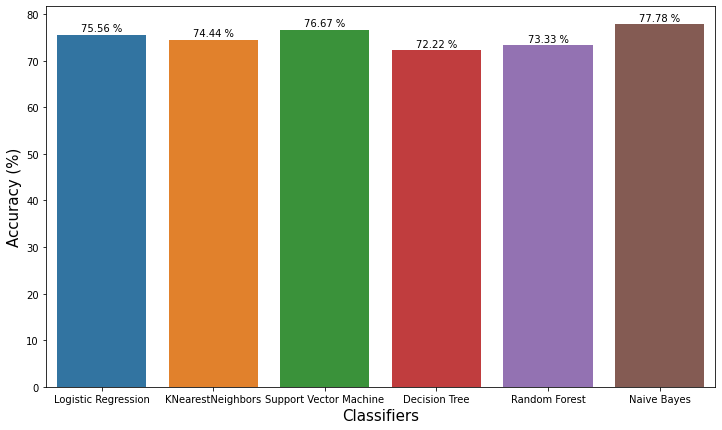

In [50]:
models = ['Logistic Regression', 'KNearestNeighbors','Support Vector Machine', 'Decision Tree','Random Forest', 'Naive Bayes']
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

Dari 6 Model dapat disimpulkan bahwa accuracy terbesar jatuh kepada Random Forest dengan tingkat accuracy yaitu 87.8 . 

Model Random Forest ini lebih memprediksi yaitu "Not Gonna Die" daripada "Will Die".

### Model Deployment 

In [51]:
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)